In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.gen_Distribution import *
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.To_Draw import *

In [12]:
t_end = 1000
m = 0.95
N = 100
dist = "Quantile Lorentzian"
dK = 0.2
dt = 0.1
Ks, t_dic, rs_dic, t_r_dic, rs_r_dic = Hysteresis(m,N=N,dK=dK,t_end=t_end,dist=dist,dt=dt)

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

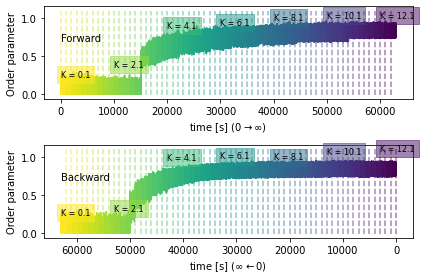

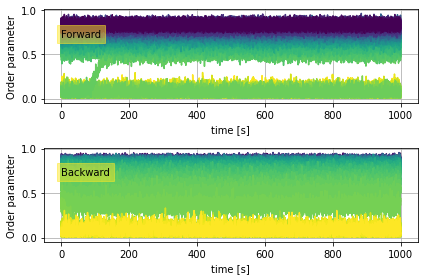

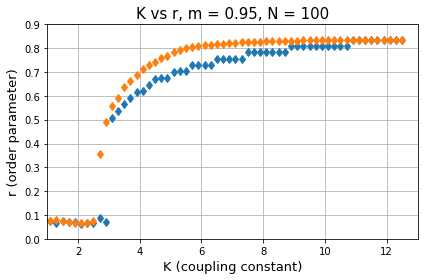

In [13]:
Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,save=True,Folder_name="Review")

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

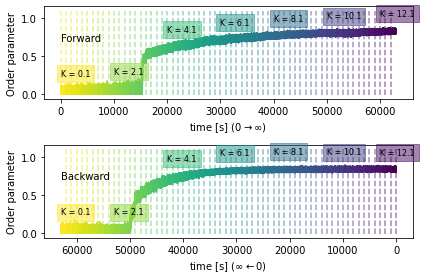

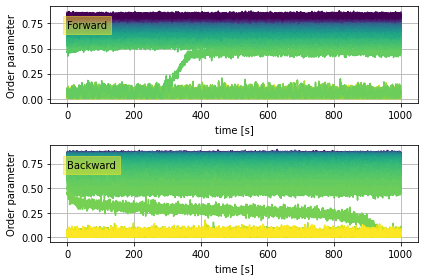

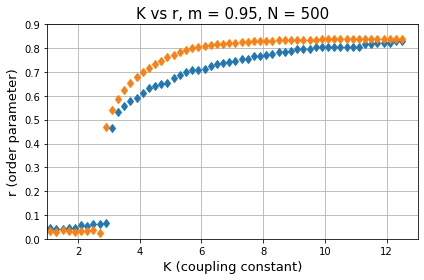

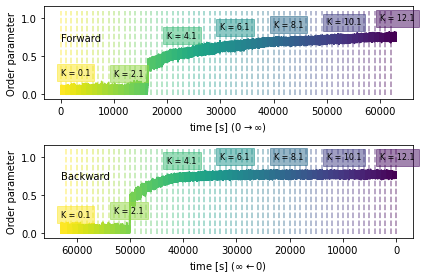

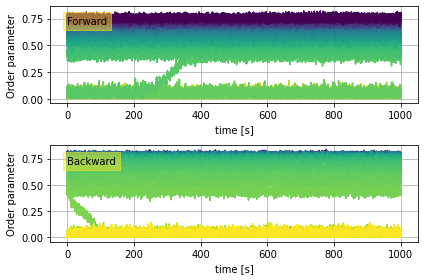

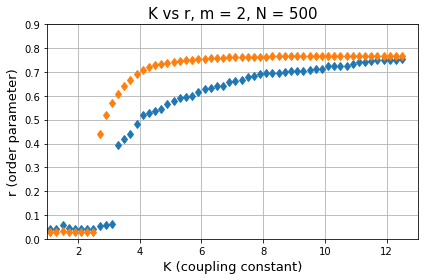

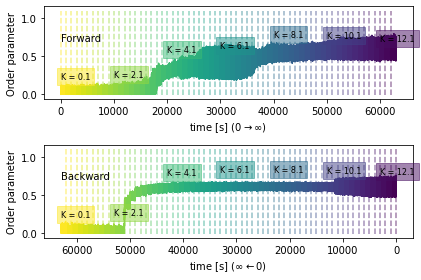

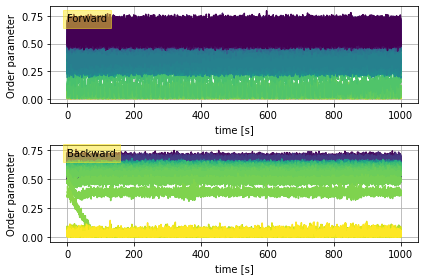

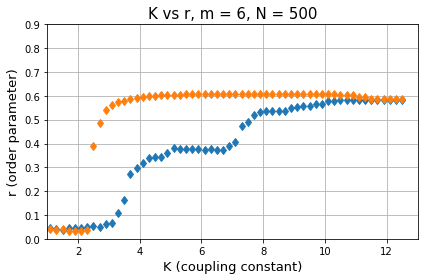

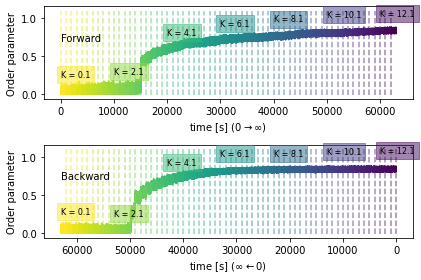

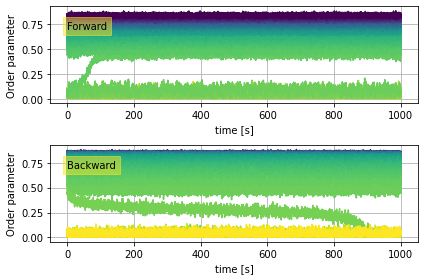

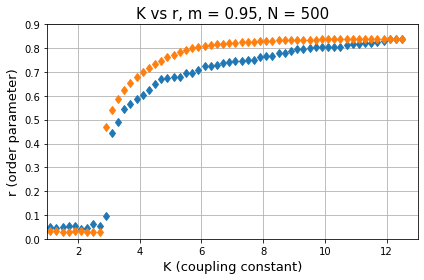

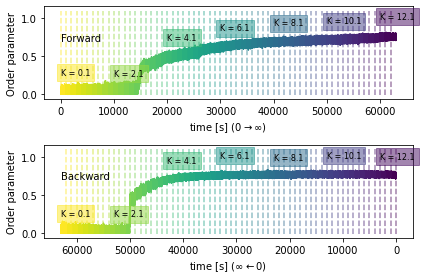

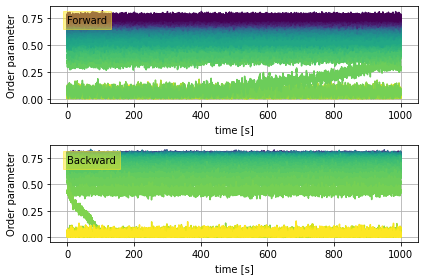

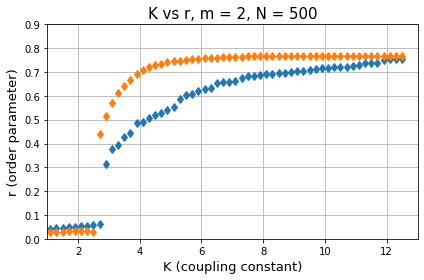

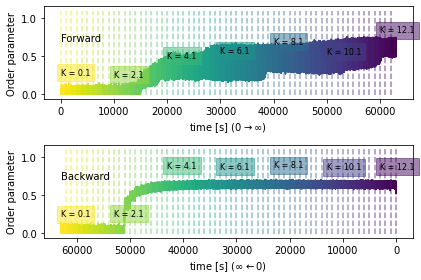

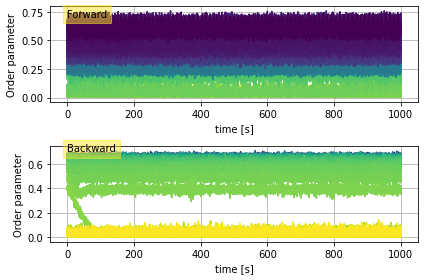

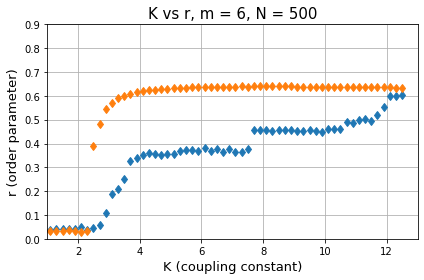

In [2]:
# Multiprocess
from TO_sim.Multi_m import Sim_Multi_mset,Sim_Multi_m_giveNoise, Sim_Multi_mset_Noise
import parmap
for Noise in [5e-2,6e-2]:
    Sim_Multi_mset_Noise(Noise)